# Analysing the calibration of the BirdMAE model on BirdSet

In [7]:

from matplotlib import pyplot as plt
from uncertainbird.utils.misc import load_data

data, predictions, targets, valid_keys = load_data("../../logs/predictions/birdmae")

Loaded data with 12000 samples
Predictions shape: torch.Size([12000, 9736])
Targets shape: torch.Size([12000, 9736])
Loaded data with 539 samples
Predictions shape: torch.Size([539, 9736])
Targets shape: torch.Size([539, 9736])
Loaded data with 24480 samples
Predictions shape: torch.Size([24480, 9736])
Targets shape: torch.Size([24480, 9736])
Loaded data with 15120 samples
Predictions shape: torch.Size([15120, 9736])
Targets shape: torch.Size([15120, 9736])
Loaded data with 4560 samples
Predictions shape: torch.Size([4560, 9736])
Targets shape: torch.Size([4560, 9736])
Loaded data with 23756 samples
Predictions shape: torch.Size([23756, 9736])
Targets shape: torch.Size([23756, 9736])
Loaded data with 205200 samples
Predictions shape: torch.Size([205200, 9736])
Targets shape: torch.Size([205200, 9736])
Loaded data with 36637 samples
Predictions shape: torch.Size([36637, 9736])
Targets shape: torch.Size([36637, 9736])
Skipped datasets (missing predictions/targets): ['perch_v2']


In [8]:
data["HSN"].keys()

dict_keys(['predictions', 'targets', 'metadata', 'color', 'metrics'])

## Global - all labels incl. non present target labels

In [9]:
from uncertainbird.utils.plotting import print_metrics

# metrics = print_metrics(predictions, targets)

In [10]:
# reliability diagram
from uncertainbird.utils.plotting import plot_reliability_diagram

# plot_reliability_diagram(
#     predictions,
#     targets,
#     n_bins=10,
#     title=f"Reliability Diagram - ConvNeXt_BS on BirdSet | ECE weighted = {metrics['ece_weighted']*100:.2f}%",
# )

## Globael - only classes present in the target labels

```python

In [11]:
# how many classes are represented by atleast one sample in the targets?
print("Number of classes in targets:", targets.sum(dim=0).gt(0).sum().item())
# how many classes are represented by atleast 5 samples in the targets?
print(
    "Number of classes with atleast 5 samples in targets:",
    targets.sum(dim=0).ge(5).sum().item(),
)

Number of classes in targets: 411
Number of classes with atleast 5 samples in targets: 372


In [12]:
# select only target classes
predictions_targetclasses = predictions[:, targets.sum(dim=0).gt(0)]
targets_targetclasses = targets[:, targets.sum(dim=0).gt(0)]

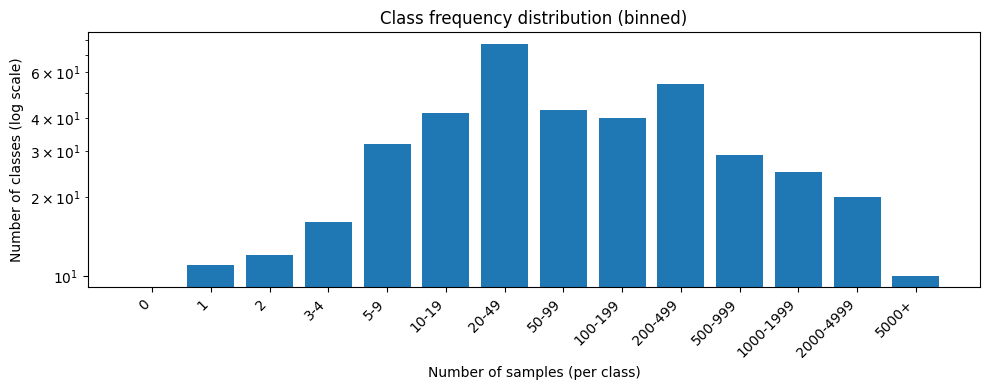

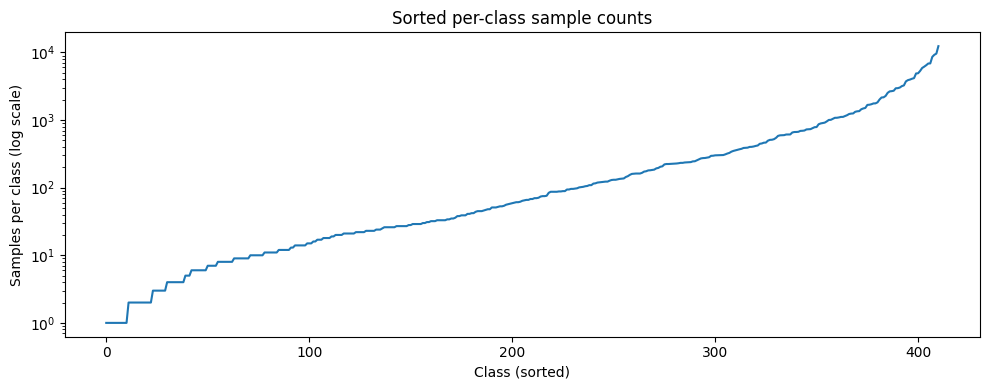

In [13]:
from uncertainbird.utils.plotting import plot_class_frequency

plot_class_frequency(targets_targetclasses)

In [14]:
from uncertainbird.utils.plotting import print_metrics

metrics_targetclasses = print_metrics(predictions_targetclasses, targets_targetclasses)

/workspace/.venv/lib/python3.10/site-packages/torchmetrics/functional/classification/calibration_error.py:48: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at /pytorch/aten/src/ATen/native/BucketizationUtils.h:32.)
  indices = torch.bucketize(confidences, bin_boundaries, right=True) - 1


Accuracy: tensor(0.9986)
cmAP: tensor(0.3557)
Precision: tensor(0.5182)
Recall: tensor(0.1857)
F1 Score: tensor(0.2352)
AUROC: tensor(0.9795)
ECE: tensor(0.0347)
ECE Weighted: tensor(0.0762)
ECE Top-3: tensor(0.0843)
ECE Top-5: tensor(0.1063)
ECE Top-10: tensor(0.0948)
ECE Top-21: tensor(0.1042)
Miscalibration Score (MCS): tensor(0.0701)
ECE Under-confidence: tensor(0.0030)
ECE Over-confidence: tensor(0.0732)


<Axes: title={'center': 'Reliability Diagram - BirdMAE on BirdSet`s target classes | ECE weighted = 7.62%'}, xlabel='Mean Predicted Probability', ylabel='Fraction of Positives'>

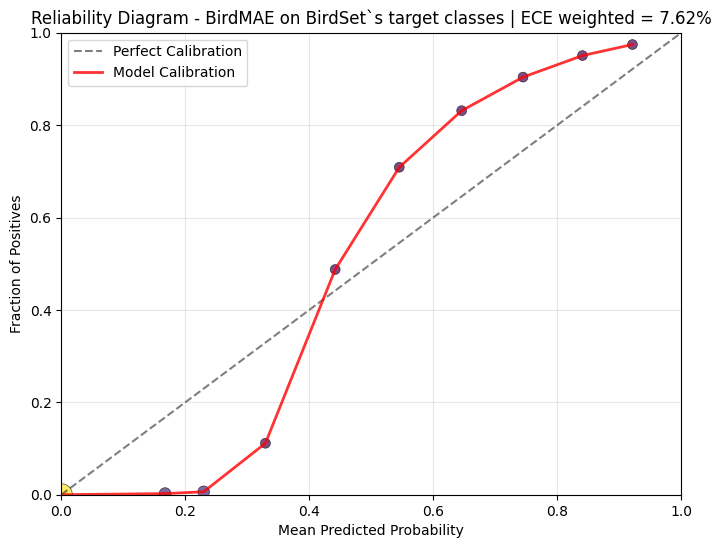

In [15]:
# reliability diagram
from uncertainbird.utils.plotting import plot_reliability_diagram

plot_reliability_diagram(
    predictions_targetclasses,
    targets_targetclasses,
    n_bins=10,
    title=f"Reliability Diagram - BirdMAE on BirdSet`s target classes | ECE weighted = {metrics_targetclasses['ece_weighted']*100:.2f}%",
)

## Class-wise Calibration Plots

In [16]:
# only select classes with target labels
for key in list(data.keys()):
    # keep the dict structure; only replace the predictions/targets tensors
    preds = data[key]["predictions"][:, targets.sum(dim=0).gt(0)]
    tars = data[key]["targets"][:, targets.sum(dim=0).gt(0)]
    data[key]["predictions"] = preds
    data[key]["targets"] = tars
    # metadata and color remain unchanged

In [17]:
# compute metrics
for key in data:
    print("Computing metrics for", key)
    preds = data[key]["predictions"]
    tar = data[key]["targets"]
    data[key]["metrics"] = print_metrics(preds, tar)

Computing metrics for HSN


/workspace/.venv/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Average precision score for one or more classes was `nan`. Ignoring these classes in macro-average
  warnings.warn(*args, **kwargs)  # noqa: B028
/workspace/.venv/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


Accuracy: tensor(0.9989)
cmAP: tensor(0.4628)
Precision: tensor(0.0286)
Recall: tensor(0.0097)
F1 Score: tensor(0.0123)
AUROC: tensor(0.0443)
ECE: tensor(0.0100)
ECE Weighted: tensor(0.1521)
ECE Top-3: tensor(0.1513)
ECE Top-5: tensor(0.1587)
ECE Top-10: tensor(0.1878)
ECE Top-21: tensor(0.1956)
Miscalibration Score (MCS): tensor(0.0896)
ECE Under-confidence: tensor(0.0312)
ECE Over-confidence: tensor(0.1209)
Computing metrics for NBP
Accuracy: tensor(0.9969)
cmAP: tensor(0.6242)
Precision: tensor(0.0981)
Recall: tensor(0.0381)
F1 Score: tensor(0.0509)
AUROC: tensor(0.1138)
ECE: tensor(0.0243)
ECE Weighted: tensor(0.1932)
ECE Top-3: tensor(0.1837)
ECE Top-5: tensor(0.1854)
ECE Top-10: tensor(0.1826)
ECE Top-21: tensor(0.1893)
Miscalibration Score (MCS): tensor(0.1786)
ECE Under-confidence: tensor(0.0073)
ECE Over-confidence: tensor(0.1859)
Computing metrics for NES
Accuracy: tensor(0.9990)
cmAP: tensor(0.3529)
Precision: tensor(0.0959)
Recall: tensor(0.0496)
F1 Score: tensor(0.0565)
AU

### Reliability Diagram
```

#### Combined

<Axes: title={'center': 'Combined Reliability Diagram - ConvNeXt_BS on BirdSet'}, xlabel='Mean Predicted Probability', ylabel='Fraction of Positives'>

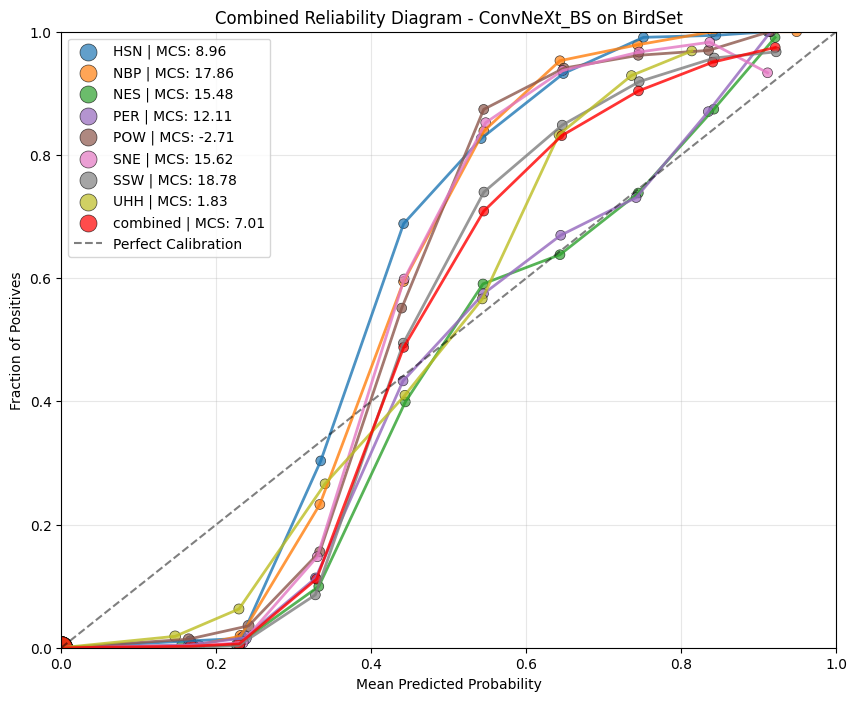

In [18]:
from uncertainbird.utils.plotting import plot_combined_reliability_diagram

# add average / combined data of all datasets
data["combined"] = {
    "predictions": predictions_targetclasses,
    "targets": targets_targetclasses,
    "metadata": None,
    "metrics": metrics_targetclasses,
    "color": "red",  # color for combined plot
}

plot_combined_reliability_diagram(
    data, n_bins=10, title="Combined Reliability Diagram - ConvNeXt_BS on BirdSet"
)

#### Per class

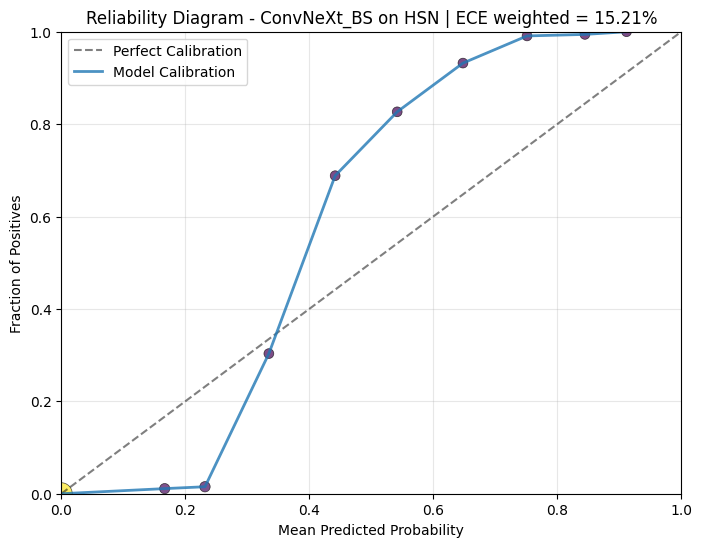

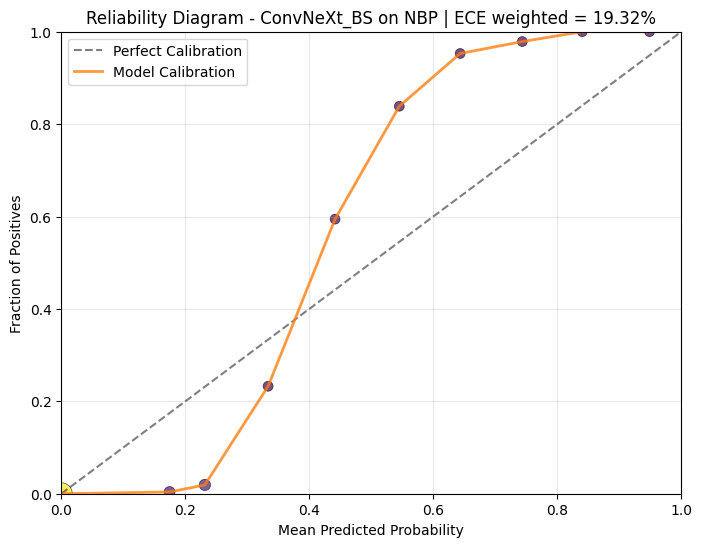

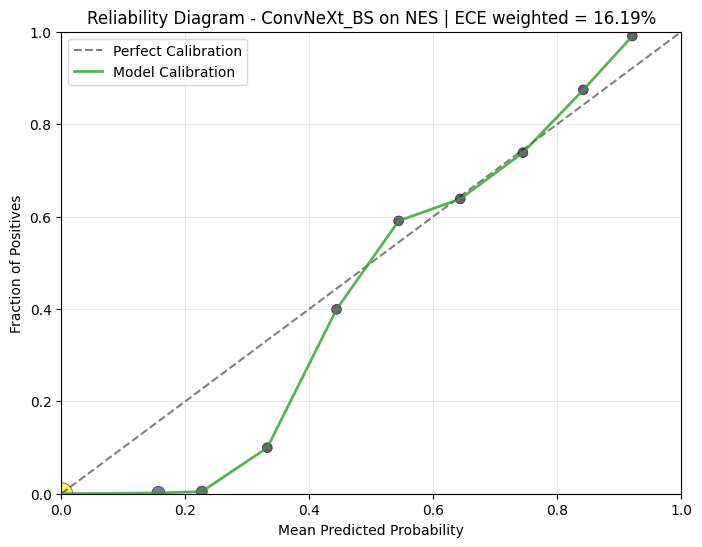

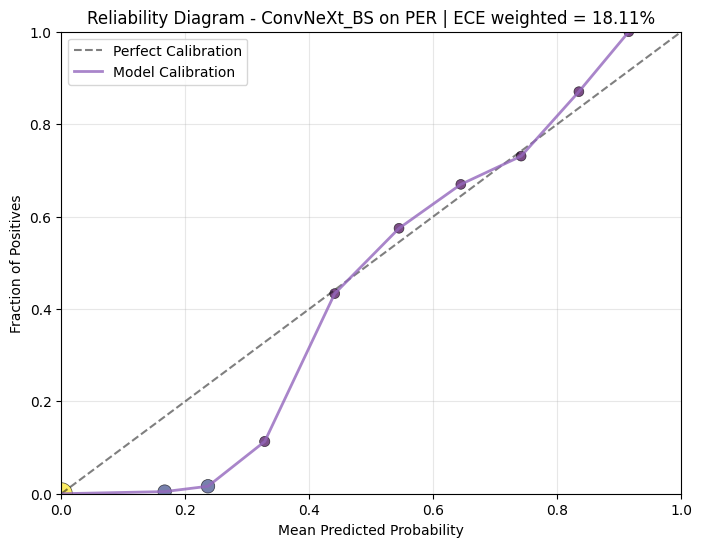

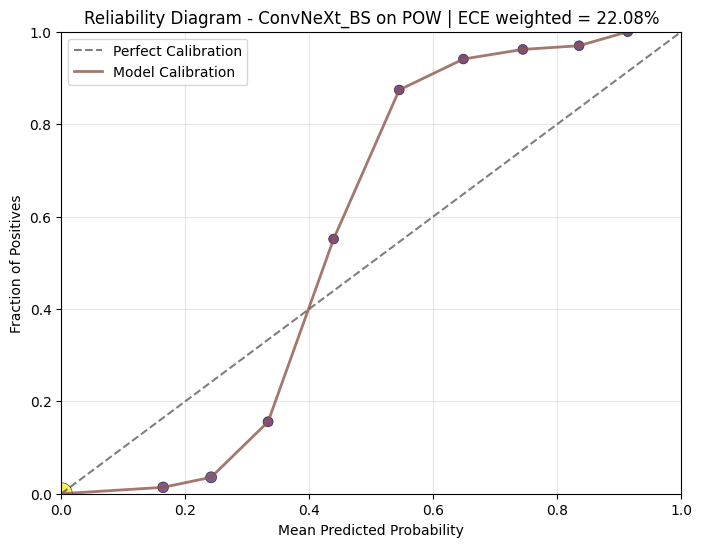

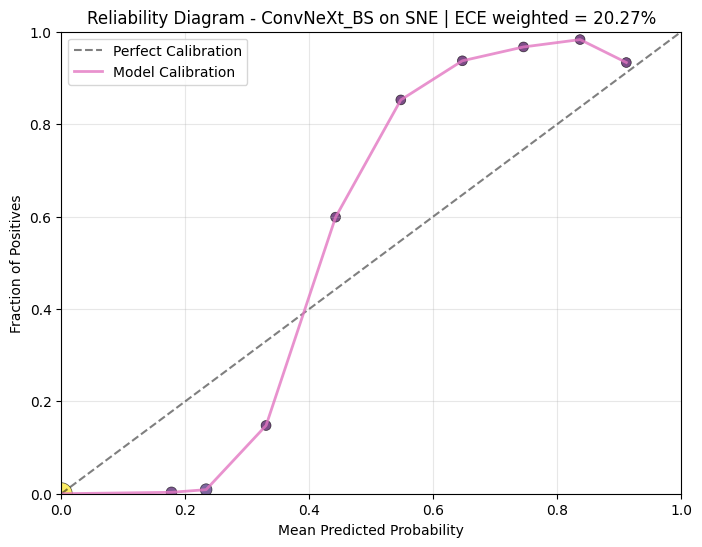

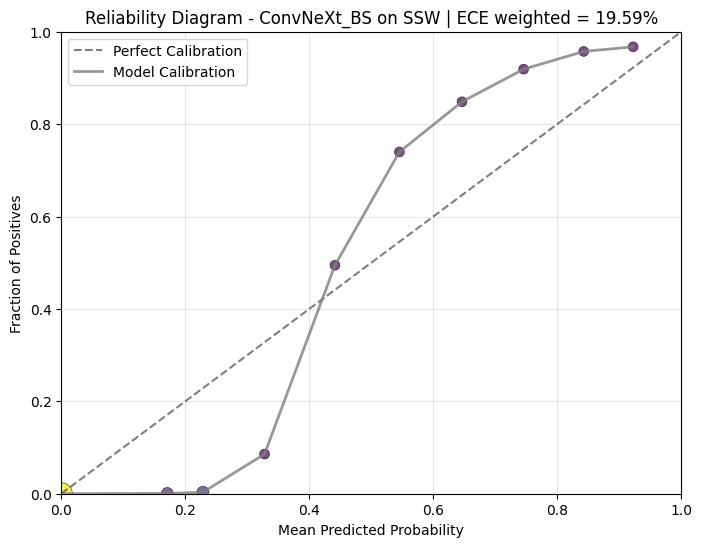

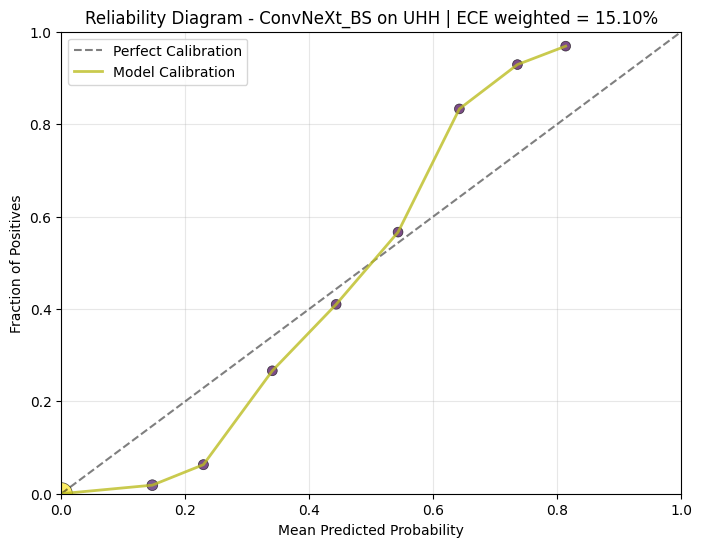

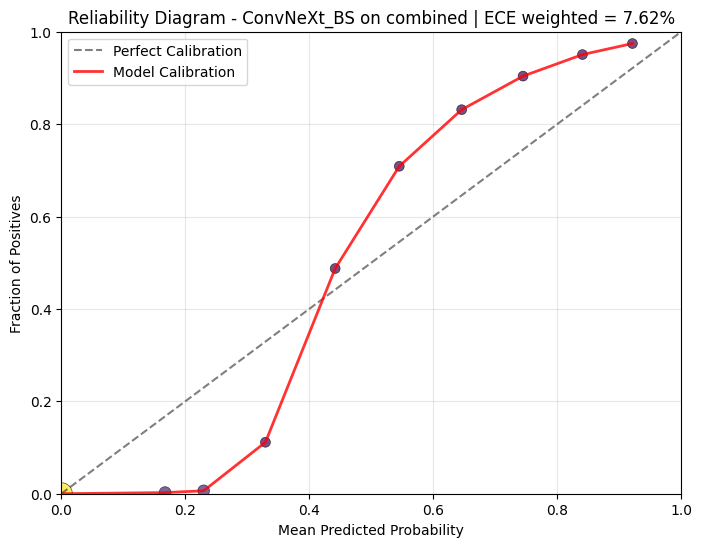

In [19]:
for key in data:
    plot_reliability_diagram(
        data[key]["predictions"],
        data[key]["targets"],
        n_bins=10,
        title=f"Reliability Diagram - ConvNeXt_BS on {key} | ECE weighted = {data[key]['metrics']['ece_weighted']*100:.2f}%",
        color=data[key].get("color", "red"),
    )

In [20]:
from uncertainbird.utils.misc import class_wise_statistics

preds = predictions_targetclasses.float()
tar = targets_targetclasses.int()

class_stats = class_wise_statistics(preds, tar, n_bins=10)

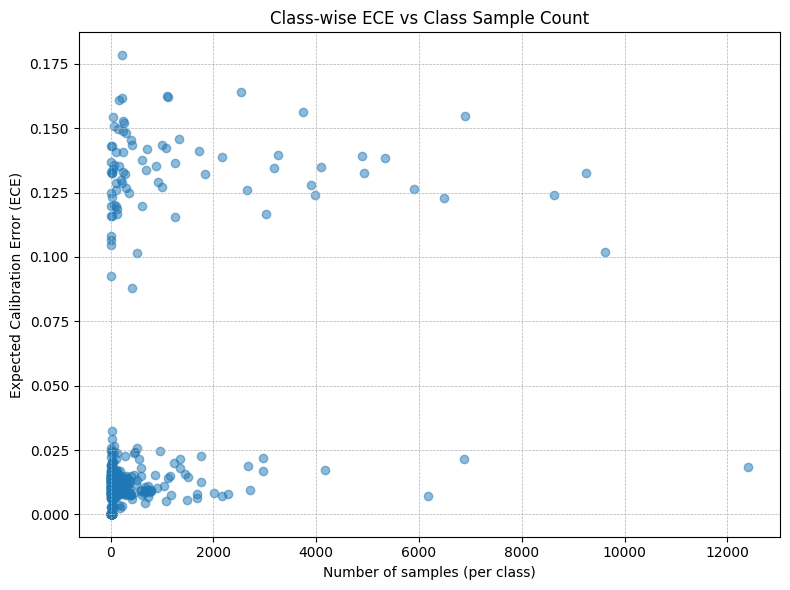

In [21]:
# plot ece vs class sample count
plt.figure(figsize=(8, 6))
plt.scatter(class_stats["positive_samples"], class_stats["ece"], alpha=0.5)
plt.xlabel("Number of samples (per class)")
plt.ylabel("Expected Calibration Error (ECE)")
plt.title("Class-wise ECE vs Class Sample Count")
plt.grid(True, ls="--", lw=0.5)
plt.tight_layout()
plt.show()

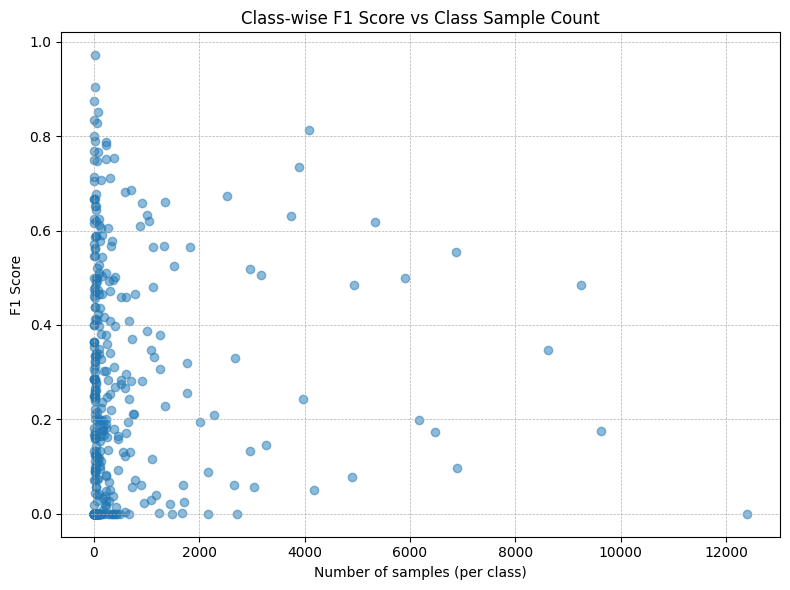

In [22]:
# f1 vs class sample count
plt.figure(figsize=(8, 6))
plt.scatter(class_stats["positive_samples"], class_stats["f1_score"], alpha=0.5)
plt.xlabel("Number of samples (per class)")
plt.ylabel("F1 Score")
plt.title("Class-wise F1 Score vs Class Sample Count")
plt.grid(True, ls="--", lw=0.5)
plt.tight_layout()

In [23]:
# print cmAP for each dataset in the format "Dataset: <name>, cmAP: <value>"
print("cmAP per dataset:")
for key in data:
    print(f"Dataset: {key}, cmAP: {data[key]['metrics']['cmAP']*100:.2f}")

print("ECE for each dataset:")
for key in data:
    print(f"Dataset: {key}, ece: {data[key]['metrics']['ece_weighted']*100:.2f}")
print("MCS for each dataset:")
for key in data:
    print(f"Dataset: {key}, mcs: {data[key]['metrics']['mcs']*100:.2f}")
print("Under confidence score for each dataset:")
for key in data:
    print(f"Dataset: {key}, mcs: {data[key]['metrics']['ece_under']*100:.2f}")
print("Over confidence score for each dataset:")
for key in data:
    print(f"Dataset: {key}, mcs: {data[key]['metrics']['ece_over']*100:.2f}")

cmAP per dataset:
Dataset: HSN, cmAP: 46.28
Dataset: NBP, cmAP: 62.42
Dataset: NES, cmAP: 35.29
Dataset: PER, cmAP: 25.28
Dataset: POW, cmAP: 39.51
Dataset: SNE, cmAP: 30.56
Dataset: SSW, cmAP: 35.35
Dataset: UHH, cmAP: 22.33
Dataset: combined, cmAP: 35.57
ECE for each dataset:
Dataset: HSN, ece: 15.21
Dataset: NBP, ece: 19.32
Dataset: NES, ece: 16.19
Dataset: PER, ece: 18.11
Dataset: POW, ece: 22.08
Dataset: SNE, ece: 20.27
Dataset: SSW, ece: 19.59
Dataset: UHH, ece: 15.10
Dataset: combined, ece: 7.62
MCS for each dataset:
Dataset: HSN, mcs: 8.96
Dataset: NBP, mcs: 17.86
Dataset: NES, mcs: 15.48
Dataset: PER, mcs: 12.11
Dataset: POW, mcs: -2.71
Dataset: SNE, mcs: 15.62
Dataset: SSW, mcs: 18.78
Dataset: UHH, mcs: 1.83
Dataset: combined, mcs: 7.01
Under confidence score for each dataset:
Dataset: HSN, mcs: 3.12
Dataset: NBP, mcs: 0.73
Dataset: NES, mcs: 0.35
Dataset: PER, mcs: 3.00
Dataset: POW, mcs: 12.40
Dataset: SNE, mcs: 2.32
Dataset: SSW, mcs: 0.40
Dataset: UHH, mcs: 6.63
Dataset: 